In [35]:
import ast 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
from adjustText import adjust_text


# Set the path to the file you'd like to load
file_path = 'M:/3_datasets/covid_19_data.csv'

# Load the latest version
df = pd.read_csv(file_path)

#clean
df.columns = df.columns.str.replace(' ', '_')
df['Last_Update'] = pd.to_datetime(df['Last_Update'], format='mixed') 
df['ObservationDate']= pd.to_datetime(df['ObservationDate'])

df.set_index('SNo', inplace=True)

df['Country/Region']= df['Country/Region'].fillna('else')
df['Province/State']= df['Province/State'].fillna('else')

df[['Confirmed','Deaths','Recovered']] = df[['Confirmed','Deaths','Recovered']].clip(lower=0) 

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306429 entries, 1 to 306429
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ObservationDate  306429 non-null  datetime64[ns]
 1   Province/State   306429 non-null  object        
 2   Country/Region   306429 non-null  object        
 3   Last_Update      306429 non-null  datetime64[ns]
 4   Confirmed        306429 non-null  float64       
 5   Deaths           306429 non-null  float64       
 6   Recovered        306429 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(2)
memory usage: 18.7+ MB


In [37]:
df.head()

,ObservationDate,Province/State,Country/Region,Last_Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [38]:
# filter only US data
df_US= df[df['Country/Region'] == 'US']

In [39]:
# DISCOVER wich State was more confirmed by COVID-19 in US
df_US.groupby('Province/State')['Confirmed'].max().sort_values(ascending=False)

Province/State
California               3788713.0
Texas                    2952861.0
Florida                  2320818.0
New York                 2101055.0
Illinois                 1380978.0
                           ...    
Virgin Islands, U.S.           1.0
Wayne County, PA               1.0
American Samoa                 0.0
Montgomery County, TX          0.0
Recovered                      0.0
Name: Confirmed, Length: 199, dtype: float64

In [40]:
df_California= df[df['Province/State'] == 'California'] # California data only
df_Texas= df[df['Province/State'] == 'Texas'] # Texas data only
df_Florida= df[df['Province/State'] == 'Florida'] # Florida data only

In [41]:
df_concat= pd.concat([df_California, df_Texas, df_Florida])
df_concat_2021= df_concat[df_concat['ObservationDate'].dt.year == 2021]
df_concat_2021

,ObservationDate,Province/State,Country/Region,Last_Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
192715,2021-01-01,California,US,2021-04-02 15:13:53,2365024.0,26504.0,0.0
193478,2021-01-02,California,US,2021-04-02 15:13:53,2415246.0,26696.0,0.0
194241,2021-01-03,California,US,2021-04-02 15:13:53,2452262.0,26788.0,0.0
195005,2021-01-04,California,US,2021-04-02 15:13:53,2490518.0,27160.0,0.0
195769,2021-01-05,California,US,2021-04-02 15:13:53,2529480.0,27684.0,0.0
...,...,...,...,...,...,...,...
302920,2021-05-25,Florida,US,2021-05-26 04:20:35,2313815.0,36581.0,0.0
303685,2021-05-26,Florida,US,2021-05-27 04:20:59,2316142.0,36647.0,0.0
304450,2021-05-27,Florida,US,2021-05-28 04:20:36,2318480.0,36733.0,0.0


In [42]:
df_concat_2021['Month'] = df_concat_2021['ObservationDate'].dt.strftime('%b')
df_concat_2021

C:\Users\go\AppData\Local\Temp\ipykernel_16952\1895772740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat_2021['Month'] = df_concat_2021['ObservationDate'].dt.strftime('%b')


,ObservationDate,Province/State,Country/Region,Last_Update,Confirmed,Deaths,Recovered,Month
SNo,,,,,,,,
192715,2021-01-01,California,US,2021-04-02 15:13:53,2365024.0,26504.0,0.0,Jan
193478,2021-01-02,California,US,2021-04-02 15:13:53,2415246.0,26696.0,0.0,Jan
194241,2021-01-03,California,US,2021-04-02 15:13:53,2452262.0,26788.0,0.0,Jan
195005,2021-01-04,California,US,2021-04-02 15:13:53,2490518.0,27160.0,0.0,Jan
195769,2021-01-05,California,US,2021-04-02 15:13:53,2529480.0,27684.0,0.0,Jan
...,...,...,...,...,...,...,...,...
302920,2021-05-25,Florida,US,2021-05-26 04:20:35,2313815.0,36581.0,0.0,May
303685,2021-05-26,Florida,US,2021-05-27 04:20:59,2316142.0,36647.0,0.0,May
304450,2021-05-27,Florida,US,2021-05-28 04:20:36,2318480.0,36733.0,0.0,May


In [43]:
df_concat_2021['New_Confirmed'] = df_concat_2021['Confirmed'].diff().fillna(0)
df_concat_2021['New_Deaths'] = df_concat_2021['Deaths'].diff().fillna(0)


C:\Users\go\AppData\Local\Temp\ipykernel_16952\1223454161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat_2021['New_Confirmed'] = df_concat_2021['Confirmed'].diff().fillna(0)
C:\Users\go\AppData\Local\Temp\ipykernel_16952\1223454161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat_2021['New_Deaths'] = df_concat_2021['Deaths'].diff().fillna(0)


In [44]:
# check of there is -ve values
df_concat_2021[(df_concat_2021['New_Confirmed'] < 0) | (df_concat_2021['New_Deaths'] < 0)]

,ObservationDate,Province/State,Country/Region,Last_Update,Confirmed,Deaths,Recovered,Month,New_Confirmed,New_Deaths
SNo,,,,,,,,,,
193139,2021-01-01,Texas,US,2021-04-02 15:13:53,1782956.0,28359.0,0.0,Jan,-2005757.0,-34877.0
192781,2021-01-01,Florida,US,2021-04-02 15:13:53,1323315.0,21673.0,0.0,Jan,-1629546.0,-29818.0


In [45]:
# ignore the -ve values
df_concat_2021[['New_Confirmed','New_Deaths']] = df_concat_2021[['New_Confirmed','New_Deaths']].clip(lower=0) 

C:\Users\go\AppData\Local\Temp\ipykernel_16952\3267760109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat_2021[['New_Confirmed','New_Deaths']] = df_concat_2021[['New_Confirmed','New_Deaths']].clip(lower=0)


In [46]:
# check of there is -ve values
df_concat_2021[(df_concat_2021['New_Confirmed'] < 0) | (df_concat_2021['New_Deaths'] < 0)]

,ObservationDate,Province/State,Country/Region,Last_Update,Confirmed,Deaths,Recovered,Month,New_Confirmed,New_Deaths
SNo,,,,,,,,,,


In [47]:
# New_Confirmed pivot_table

df_pivot_confirmed = df_concat_2021.pivot_table(
    index='Month',
    columns='Province/State',
    values='New_Confirmed',
    aggfunc='sum'
).sort_index()

df_pivot_confirmed = df_pivot_confirmed.reset_index()
df_pivot_confirmed['Month_no'] = df_pivot_confirmed['Month'].apply(lambda x: pd.to_datetime(x, format='%b').month)
df_pivot_confirmed = df_pivot_confirmed.sort_values('Month_no').reset_index(drop=True)
df_pivot_confirmed = df_pivot_confirmed.set_index('Month')
df_pivot_confirmed = df_pivot_confirmed.drop(columns=['Month_no'])
df_pivot_confirmed


Province/State,California,Florida,Texas
Month,,,
Jan,959240.0,398062.0,593388.0
Feb,243318.0,187844.0,276669.0
Mar,101163.0,148514.0,138897.0
Apr,73370.0,175783.0,102018.0
May,46598.0,87300.0,58933.0


In [48]:
df_pivot_confirmed['mean_number_of_confirms']= df_pivot_confirmed.mean(axis=1)
df_pivot_confirmed

Province/State,California,Florida,Texas,mean_number_of_confirms
Month,,,,
Jan,959240.0,398062.0,593388.0,650230.000000
Feb,243318.0,187844.0,276669.0,235943.666667
Mar,101163.0,148514.0,138897.0,129524.666667
Apr,73370.0,175783.0,102018.0,117057.000000
May,46598.0,87300.0,58933.0,64277.000000


In [49]:
# New_Deathes pivot_table

df_pivot_deathes = df_concat_2021.pivot_table(
    index='Month',
    columns='Province/State',
    values='New_Deaths',
    aggfunc='sum'
).sort_index()

df_pivot_deathes = df_pivot_deathes.reset_index()
df_pivot_deathes['Month_no'] = df_pivot_deathes['Month'].apply(lambda x: pd.to_datetime(x, format='%b').month)
df_pivot_deathes = df_pivot_deathes.sort_values('Month_no').reset_index(drop=True)
df_pivot_deathes = df_pivot_deathes.set_index('Month')
df_pivot_deathes = df_pivot_deathes.drop(columns=['Month_no'])
df_pivot_deathes


Province/State,California,Florida,Texas
Month,,,
Jan,14707.0,4806.0,8715.0
Feb,11624.0,4373.0,6623.0
Mar,6439.0,2573.0,4555.0
Apr,2494.0,1736.0,1967.0
May,1468.0,1613.0,1272.0


In [50]:
df_pivot_deathes['mean_number_of_deaths']= df_pivot_deathes.mean(axis=1)
df_pivot_deathes

Province/State,California,Florida,Texas,mean_number_of_deaths
Month,,,,
Jan,14707.0,4806.0,8715.0,9409.333333
Feb,11624.0,4373.0,6623.0,7540.000000
Mar,6439.0,2573.0,4555.0,4522.333333
Apr,2494.0,1736.0,1967.0,2065.666667
May,1468.0,1613.0,1272.0,1451.000000


C:\Users\go\AppData\Local\Temp\ipykernel_16952\875935439.py:4: UserWarning: 
The markers list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_pivot_confirmed, markers='o', palette='mako', ax=ax[0])
C:\Users\go\AppData\Local\Temp\ipykernel_16952\875935439.py:29: UserWarning: 
The markers list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_pivot_deathes, markers='o', palette='mako', ax=ax[1])


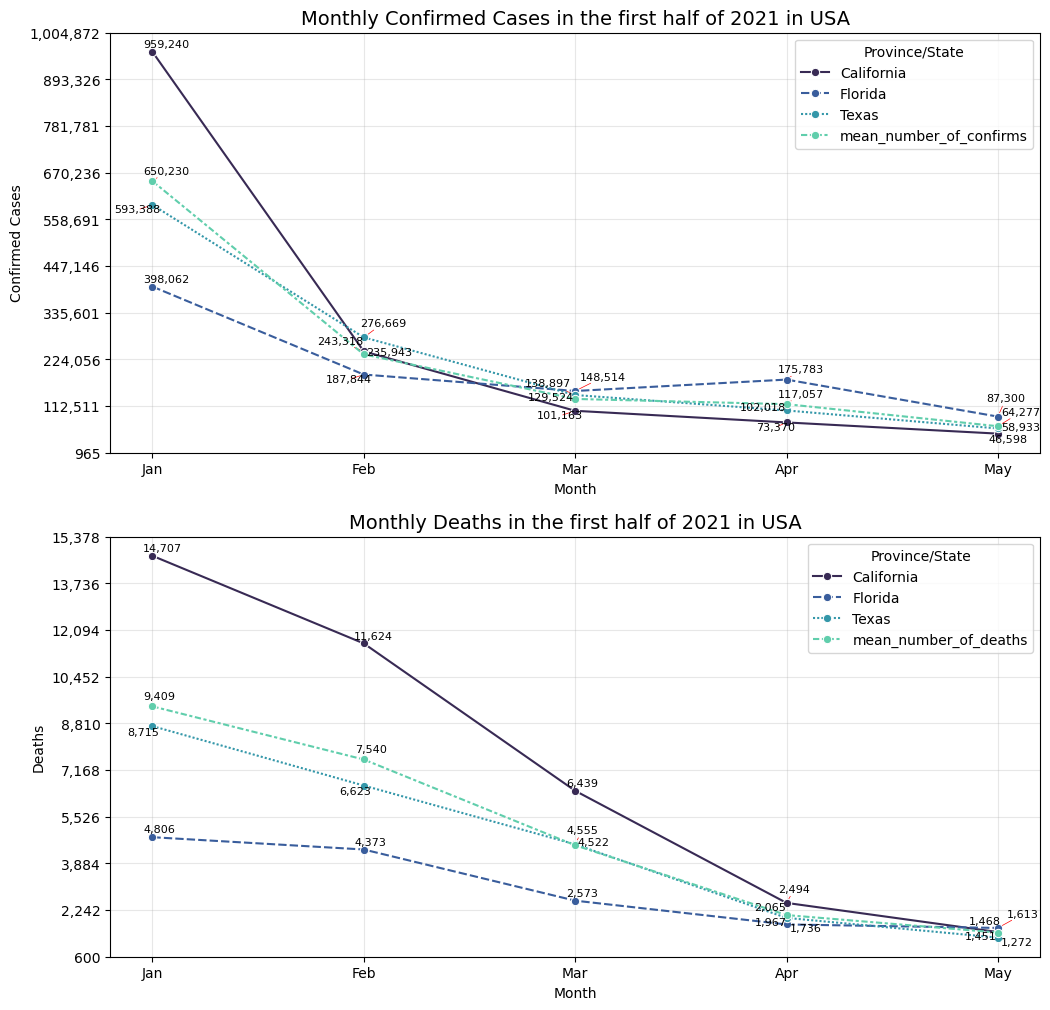

In [51]:
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# ------------------ Confirmed cases ------------------
sns.lineplot(data=df_pivot_confirmed, markers='o', palette='mako', ax=ax[0])

ax[0].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
ymin, ymax = ax[0].get_ylim()
ax[0].set_yticks(np.linspace(ymin, ymax, 10))

ax[0].set_title("Monthly Confirmed Cases in the first half of 2021 in USA", fontsize=14)
ax[0].set_xlabel("Month")
ax[0].set_ylabel("Confirmed Cases")

# Add value labels with automatic overlap adjustment
texts_confirmed = []
for line in ax[0].lines:
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    for x, y in zip(x_data, y_data):
        texts_confirmed.append(
            ax[0].text(x, y, f'{int(y):,}', fontsize=8, ha='center', va='bottom')
        )

adjust_text(texts_confirmed, ax=ax[0], arrowprops=dict(arrowstyle="-", color='r', lw=0.5))

ax[0].grid(alpha=0.3)

# ------------------ Deaths ------------------
sns.lineplot(data=df_pivot_deathes, markers='o', palette='mako', ax=ax[1])

ax[1].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
ymin, ymax = ax[1].get_ylim()
ax[1].set_yticks(np.linspace(ymin, ymax, 10))

ax[1].set_title("Monthly Deaths in the first half of 2021 in USA", fontsize=14)
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Deaths")

# Add value labels with automatic overlap adjustment
texts_deaths = []
for line in ax[1].lines:
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    for x, y in zip(x_data, y_data):
        texts_deaths.append(
            ax[1].text(x, y, f'{int(y):,}', fontsize=8, ha='center', va='bottom')
        )

adjust_text(texts_deaths, ax=ax[1], arrowprops=dict(arrowstyle="-", color='r', lw=0.5))

ax[1].grid(alpha=0.3)


plt.show()
